In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Load your imbalanced data into a Pandas DataFrame
df = pd.read_csv('HepatitisCdata.csv')


In [32]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


     Age  Sex   ALB    ALP   ALT    AST   BIL    CHE  CHOL  CREA    GGT  PROT
248   55    1  28.1   65.5  16.6   17.5   2.8   5.58  4.39  65.0   26.2  62.4
365   39    2  31.4  106.0  16.6   17.0   2.4   5.95  5.30  68.0   22.9  72.3
432   48    2  43.7   50.1  17.3   26.3   8.1   8.15  5.38  64.0   13.4  73.1
610   62    2  32.0  416.6   5.9  110.3  50.0   5.57  6.30  55.7  650.9  68.5
132   44    1  35.5   81.7  27.5   29.5   6.4   8.81  6.65  83.0   24.1  68.0
..   ...  ...   ...    ...   ...    ...   ...    ...   ...   ...    ...   ...
281   61    1  45.9   73.3  17.1   24.3   4.8  10.01  4.95  88.0   23.5  70.8
291   63    1  45.3   71.3  16.6   24.1   5.7   8.92  4.69  81.0   19.8  73.7
250   55    1  41.5   59.5  15.4   16.2   6.8   6.35  5.22  80.0   12.4  69.9
11    33    1  46.4   68.2  10.3   20.0   5.7   7.36  4.30  79.0   18.7  68.6
336   34    2  41.9   47.4  20.8   28.5   8.0   7.66  4.61  97.0   11.2  71.9

[123 rows x 12 columns]
248    0
365    0
432    0
610    1
132

c:\Users\mrsoh\OneDrive\Documents\GitHub\Multiple-Disease-Prediction-Webapp\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mrsoh\OneDrive\Documents\GitHub\Multiple-Disease-Prediction-Webapp\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mrsoh\OneDrive\Documents\GitHub\Multiple-Disease-Prediction-Webapp\env\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\mrsoh\OneDrive\Documents\GitHub\Multiple-Disease-Prediction-Webapp\e

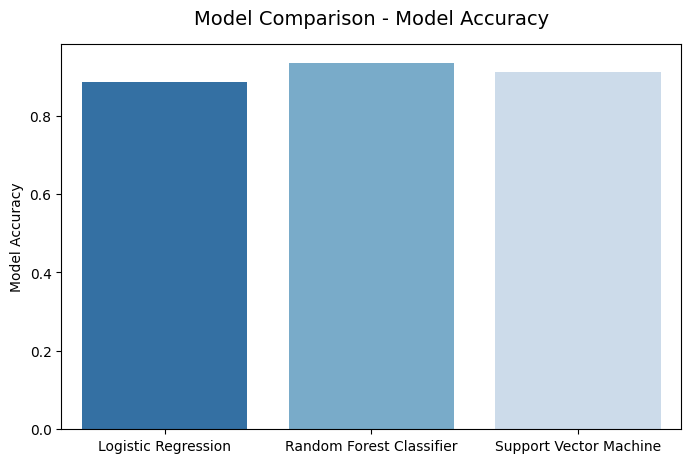

Confusion Matrix for Logistic Regression:
[[97  2]
 [12 12]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        99
           1       0.86      0.50      0.63        24

    accuracy                           0.89       123
   macro avg       0.87      0.74      0.78       123
weighted avg       0.88      0.89      0.87       123


Confusion Matrix for Random Forest Classifier:
[[99  0]
 [ 8 16]]

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        99
           1       1.00      0.67      0.80        24

    accuracy                           0.93       123
   macro avg       0.96      0.83      0.88       123
weighted avg       0.94      0.93      0.93       123


Confusion Matrix for Support Vector Machine:
[[96  3]
 [ 8 16]]

Classification Report for Support Vector Machine:
 

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

df.drop("Unnamed: 0", axis=1, inplace=True)

# Mapping numeric values
df['Category'] = df['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, "1=Hepatitis": 1, "2=Fibrosis": 1, "3=Cirrhosis": 1})
df['Sex'] = df['Sex'].map({'m': 1, 'f': 2})

# Filling missing values with the median
df.fillna(df.median(), inplace=True)

# Splitting the data into training and test datasets
# If 'GGT' and 'PROT' are not used intentionally, you can remove them from your input data.
X = df.drop(["Category"], axis=1)
y = df["Category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_test)
print(y_test)
print(X_train)
print(y_train)
# Scaling the data

print("Before Scaling - X_train shape:", X_train.shape)
print("Before Scaling - X_test shape:", X_test.shape)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("After Scaling - X_train shape:", X_train.shape)
print("After Scaling - X_test shape:", X_test.shape)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Feature names used during training:", list(X.columns))
# Convert X_test to a Pandas DataFrame
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Print feature names
print("Feature names in prediction data:", list(X_test_df.columns))

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)

# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
import joblib
joblib.dump(rfc, 'hepititisc_model.sav')
rfc_score = rfc.score(X_test, y_test)

# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)

# Model Comparison
model_names = ["Logistic Regression", "Random Forest Classifier", "Support Vector Machine"]
model_scores = [lr_score, rfc_score, svm_score]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=model_scores, palette="Blues_r")
plt.ylabel("Model Accuracy")
plt.title("Model Comparison - Model Accuracy", fontsize=14, y=1.03)
plt.show()

# Confusion Matrix and Classification Report for Logistic Regression
y_pred_lr = lr.predict(X_test)
cf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix for Logistic Regression:")
print(cf_matrix_lr)
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix and Classification Report for Random Forest Classifier
y_pred_rfc = rfc.predict(X_test)
cf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
print("\nConfusion Matrix for Random Forest Classifier:")
print(cf_matrix_rfc)
print("\nClassification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rfc))

# Confusion Matrix and Classification Report for Support Vector Machine (SVM)
y_pred_svm = svm.predict(X_test)
cf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix for Support Vector Machine:")
print(cf_matrix_svm)
print("\nClassification Report for Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))
